In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import xarray as xr
import matplotlib.ticker as mticker
from matplotlib import colors as c
import geopandas
from shapely.geometry import Point, Polygon
import regionmask
import descartes

Lese inn Shapefiler:

['Hydrologi_TotalNedborfeltMalestasjon.shx']
objType                                   NedbørfeltMålestasjon
feltNr                                                     1902
stSamletID                                         016000001000
stID                                                    160.1.0
stNavn                                             Storglåmvatn
areal_km2                                                251.85
Q6190Mm3Aa                                               797.15
Q6190mmAar                                              3165.18
Q6190lskm2                                               100.32
vf6190m3s                                                 25.27
uttakDato                                            2021-09-23
ekspType                               NVEs nedlastningsløsning
geometry      POLYGON Z ((14.35082813994262 66.7934058783317...
Name: 0, dtype: object


<AxesSubplot:>

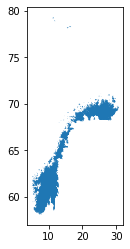

In [2]:
dirl_shape  = "nedbørsfeltNVE/NVE_shape/NVEData/Hydrologi/"
files = os.listdir(dirl_shape)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.shx')]
print(files_txt)

myfile = dirl_shape+files_txt[0]
import geopandas as gpd
shapefile = gpd.read_file(myfile)
print(shapefile.iloc[0])
shapefile.plot()

Lese inn Senorge Nedbørsdata:

In [3]:
ifile = "senorge_nedbor/NGCDrec_RR_type2_1971_2000.nc"
variable_senorge = 'RR'
ds = xr.open_dataset(ifile)[variable_senorge]
ds

<xarray.DataArray 'RR' (time: 360, Y: 373, X: 282)>
[37866960 values with dtype=float32]
Coordinates:
  * X        (X) float64 4.018e+06 4.022e+06 4.028e+06 ... 5.418e+06 5.422e+06
  * Y        (Y) float64 5.428e+06 5.422e+06 5.418e+06 ... 3.572e+06 3.568e+06
  * time     (time) datetime64[ns] 1971-01-01 1971-02-01 ... 2000-12-01
    lon      (Y, X) float32 ...
    lat      (Y, X) float32 ...
Attributes:
    units:                                    mm
    grid_mapping:                             projection_laea
    long_name:                                monthly precipitation total
    standard_name:                            precipitation_amount
    version:                                  1.0
    number_of_principal_components_retained:  40
    number_of_stations_used:                  596
    data_transformation:                      gamma
    prod_date:                                2020-05-26

isel er det same som iloc i dataframes, velger ut eit punkt i serien 

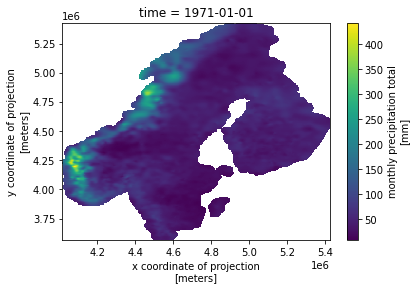

In [4]:
ds.isel(time=0).plot();

In [3]:
dirl  = "Discharge/"
files = os.listdir(dirl)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.txt_')]

files_txt = [i[:-5] for i in files if i.endswith('.txt_')]
files_txt.sort(key=int)
files_txt

['200284',
 '600010',
 '1900079',
 '5500004',
 '7200005',
 '9100002',
 '12700013',
 '15600008',
 '19600007',
 '24400002',
 '31100460']

In [4]:
my_st = ['2.284.0','6.10.0', '19.79.0', '55.4.0','72.5.0','91.2.0','127.13.0','156.8.0','196.7.0','244.2.0','311.460.0'] 

In [5]:
selected_stations = files_txt
variable_senorge = 'RR'


In [6]:
nf = shapefile
nf

,objType,feltNr,stSamletID,stID,stNavn,areal_km2,Q6190Mm3Aa,Q6190mmAar,Q6190lskm2,vf6190m3s,uttakDato,ekspType,geometry
0,NedbørfeltMålestasjon,1902,016000001000,160.1.0,Storglåmvatn,251.85,797.15,3165.18,100.32,25.27,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((14.35083 66.79341 0.00000, 14.3504..."
1,NedbørfeltMålestasjon,1904,016000004000,160.4.0,Fykanvatn ndf.,316.10,969.58,3067.32,97.22,30.73,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((14.06225 66.83937 0.00000, 14.0631..."
2,NedbørfeltMålestasjon,1909,016000009000,160.9.0,Lysvatn,14.12,37.38,2647.31,83.91,1.18,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((13.94244 66.91917 0.00000, 13.9424..."
3,NedbørfeltMålestasjon,1910,016000010000,160.10.0,Øvre Navervatn,11.91,34.08,2861.46,90.70,1.08,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((14.06225 66.83937 0.00000, 14.0631..."
4,NedbørfeltMålestasjon,1911,016000011000,160.11.0,Nedre Navervatn,22.71,61.44,2705.42,85.75,1.95,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((14.06225 66.83937 0.00000, 14.0631..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,NedbørfeltMålestasjon,1513,009800004000,98.4.0,Øye ndf.,139.22,269.56,1936.22,61.37,8.54,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((6.98439 62.06517 0.00000, 6.98506 ..."
2594,NedbørfeltMålestasjon,879,002500024000,25.24.0,Gjuvvatn,96.98,199.83,2060.53,65.31,6.33,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((7.20484 59.23029 0.00000, 7.20537 ..."
2595,NedbørfeltMålestasjon,881,002500032000,25.32.0,Knabåni,46.00,98.96,2151.30,68.19,3.14,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((7.01460 58.70515 0.00000, 7.01543 ..."
2596,NedbørfeltMålestasjon,1367,007900003000,79.3.0,Nessedalselv,30.17,60.07,1991.05,63.11,1.90,2021-09-23,NVEs nedlastningsløsning,"POLYGON Z ((6.34247 61.20438 0.00000, 6.34693 ..."


Velge alle rader med våre stasjonverdiar

Resetter indexen

In [7]:
nf_selected = nf[nf.stID.isin(my_st)]
nf_selected = nf_selected.reset_index()
st_names = nf_selected.stID
st_names

0       19.79.0
1       156.8.0
2       196.7.0
3       244.2.0
4       2.284.0
5      127.13.0
6        72.5.0
7        55.4.0
8        91.2.0
9        6.10.0
10    311.460.0
Name: stID, dtype: object

Plotte stasjonane, får nytt koordinatsystem 

Kan plukke ut enkeltstasjonar med iloc - dobbel [[]] sidan inne i dataframe

<AxesSubplot:>

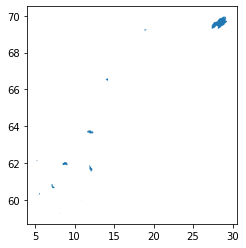

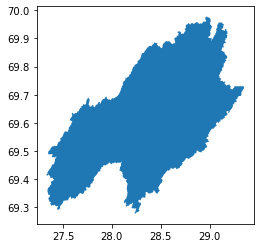

In [8]:
nf_selected.plot()

nf_selected.iloc[[3]].plot()

Skal bruke regionmask til å laste inn senorge data

Bruke nf_selected til å laste inn en mask til endbørsfeltet

In [9]:
st_regions = regionmask.from_geopandas(nf_selected, names='stID', name='catchment')
st_regions

<regionmask.Regions>
Name:     catchment

Regions:
 0  r0   19.79.0
 1  r1   156.8.0
 2  r2   196.7.0
 3  r3   244.2.0
 4  r4   2.284.0
..  ..       ...
 6  r6    72.5.0
 7  r7    55.4.0
 8  r8    91.2.0
 9  r9    6.10.0
10 r10 311.460.0

[11 regions]

Kan no bruke denne på samme måte som andre, maskere på koordinatsystemet man ønsker

Seier ein vil maskere basert på senorge dataa sine koordinatsystem

Endå ikkje noken nedbørsverdiar innan desse, berre kva tal frå 0-2

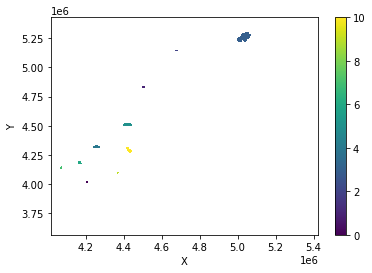

In [12]:
mask_regions = st_regions.mask(ds.lon, ds.lat)
mask_regions.plot()

ETTER DETTE: LAG FOR LOOP / FUNKSJON SLIK AT ALLE STASJONAR BLIR INKL I CURRENT_TS


Skal no ta inn nedbørsverdiar inn i maskene

In [13]:
current_stID = st_names[1]
current_stID

'156.8.0'

In [14]:
multiple_stIDs = []
for i in range(0,11):
    multiple_stIDs.append(st_names[i] )
multiple_stIDs

['19.79.0',
 '156.8.0',
 '196.7.0',
 '244.2.0',
 '2.284.0',
 '127.13.0',
 '72.5.0',
 '55.4.0',
 '91.2.0',
 '6.10.0',
 '311.460.0']

Lage eigen maske for berre en stasjon og få inn nedbørdata

In [15]:
current_key = st_regions.map_keys(current_stID)
current_d = ds.where(mask_regions == current_key)

In [16]:
multi_d = []
for i in range(0,11):
    multi_key = st_regions.map_keys(multiple_stIDs[i])
    multi_d.append(ds.where(mask_regions == multi_key))

multi_d

[<xarray.DataArray 'RR' (time: 360, Y: 373, X: 282)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
 ...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
   

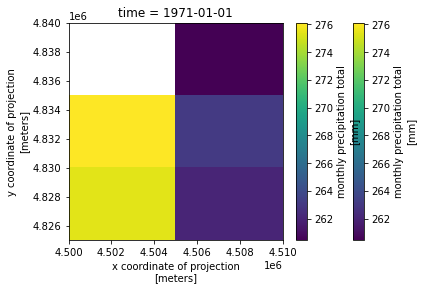

In [17]:
#trenge egentlig ikkje er berre for å sjå 
current_d.isel(time=0).plot()
#Kutte til berre rundt feltet
cutit = current_d.dropna(dim='Y', how='all')
cutit = cutit.dropna(dim='X', how='all')
cutit.isel(time=0).plot()

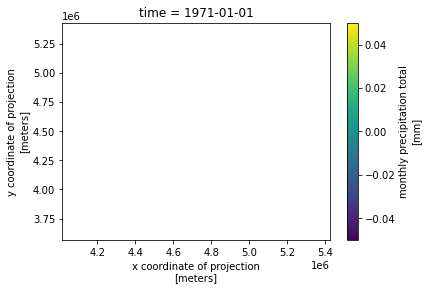

In [18]:
multi_d[8].isel(time=0).plot()

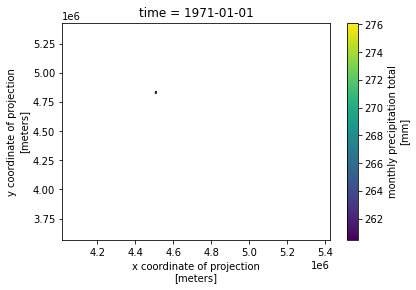

In [19]:
current_d.isel(time=0).plot()

In [20]:
#For å lage tidsserie ts
#Vil lage RR kolonne for kvar stasjon av interesse
#Gir kvar kolonne stasjonsnamn
current_ts = current_d.mean(dim=['X', 'Y']).to_dataframe()
current_ts = current_ts.rename(columns={current_d.name: current_stID})
current_ts

,156.8.0
time,
1971-01-01,267.438416
1971-02-01,141.634598
1971-03-01,79.839798
1971-04-01,105.667007
1971-05-01,144.106003
...,...
2000-08-01,160.252213
2000-09-01,230.767181
2000-10-01,66.469803


In [21]:
multi_mean = multi_d[0].mean(dim=['X','Y']).to_dataframe()
multi_mean = multi_mean.rename(columns={multi_d[0].name: multiple_stIDs[0]})

for i in range(1,11):
    multi_mean[multiple_stIDs[i]]= multi_d[i].mean(dim=['X','Y']).to_dataframe()
multi_mean

,19.79.0,156.8.0,196.7.0,244.2.0,2.284.0,127.13.0,72.5.0,55.4.0,91.2.0,6.10.0,311.460.0
time,,,,,,,,,,,
1971-01-01,59.848999,267.438416,112.519501,35.532135,21.137299,69.386780,173.122665,214.390671,NaN,66.488998,28.409292
1971-02-01,57.431000,141.634598,45.842499,15.581378,27.998102,72.924309,108.715889,216.082657,NaN,71.599998,33.964764
1971-03-01,51.848000,79.839798,59.631001,15.697019,20.237799,63.052570,88.968781,145.491333,NaN,58.186001,28.207470
1971-04-01,26.354000,105.667007,40.802498,16.141371,10.929300,40.341564,72.225777,101.427673,NaN,32.522999,26.229822
1971-05-01,50.257999,144.106003,32.122002,7.812792,18.119251,66.827042,75.707779,150.408325,NaN,66.972000,58.055939
...,...,...,...,...,...,...,...,...,...,...,...
2000-08-01,98.807999,160.252213,74.889999,48.822090,57.213696,147.540298,124.828667,226.157669,NaN,117.202003,65.153824
2000-09-01,84.286003,230.767181,67.410995,55.481598,18.258200,44.683041,117.289009,157.943665,NaN,51.859001,24.749943
2000-10-01,253.964996,66.469803,31.587502,23.303783,58.521801,30.897087,120.147789,232.549332,NaN,248.639008,136.087051


<AxesSubplot:xlabel='time'>

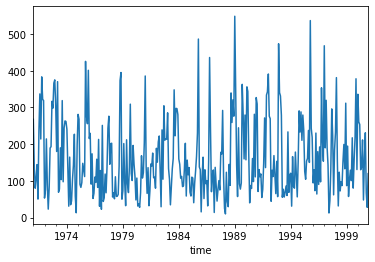

In [22]:
multi_mean['156.8.0'].plot()

Text(0.5, 1.0, 'Average Monthly Rain')

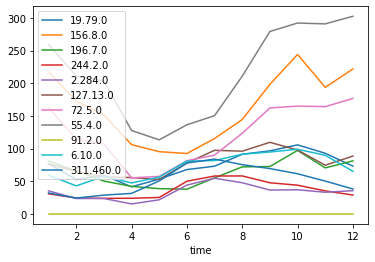

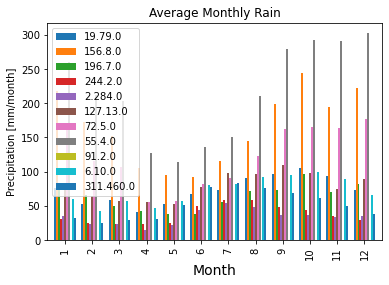

In [23]:
monD = multi_mean.resample('m').sum()
multimonD = monD.groupby(monD.index.month).mean()
multimonD

# plot result
multimonD["156.8.0"]
multimonD.plot()
multimonD.plot.bar(width=0.8)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Precipitation [mm/month]")
plt.title("Average Monthly Rain")
#multimonD

In [24]:
myrollingmonth = multi_mean['156.8.0'].rolling(window=31, center=True, min_periods=28).mean()
myrollingmin = multi_mean['156.8.0'].rolling(window=31, center=True, min_periods=28).min()
myrollingmax = multi_mean['156.8.0'].rolling(window=31, center=True, min_periods=28).max()
mm=multi_mean['156.8.0'].resample('m').mean()
mymonth = multi_mean['156.8.0'].rolling(window=31, center=True, min_periods=28).mean()
mmmymonth = mm.rolling(window=31, center=True, min_periods=28).mean()

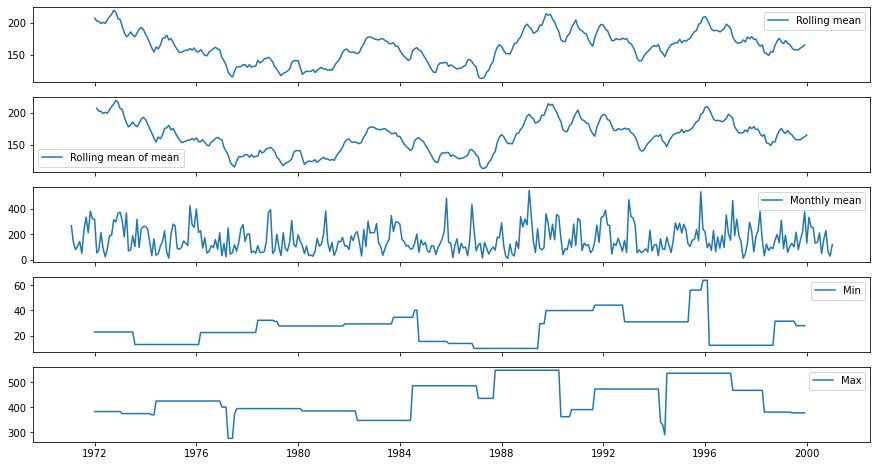

In [25]:
fig, axs = plt.subplots(5, sharex=True, figsize=(15,8))
axs[0].plot(myrollingmonth, label='Rolling mean')
axs[0].legend()
axs[1].plot(mmmymonth, label='Rolling mean of mean')
axs[1].legend()
axs[2].plot(mm, label='Monthly mean')
axs[2].legend()
axs[3].plot(myrollingmin, label='Min')
axs[3].legend()
axs[4].plot(myrollingmax, label='Max')
axs[4].legend()

In [26]:
import pymannkendall as mk

In [27]:

df = multi_mean['2.284.0']
df.index = pd.to_datetime(df.index,format="%Y%m/%H%M")
myperiod = df["1971":"2000"]
ym = myperiod.resample("y").mean()
result5 = mk.original_test(myrollingmax, alpha=0.05)
result5

Mann_Kendall_Test(trend='increasing', h=True, p=1.9300578912861965e-09, z=6.003586564423826, Tau=0.21881663113006397, s=12315.0, var_s=4207041.0, slope=0.23733052168742264, intercept=382.7137770699983)

In [28]:
df = multi_mean['19.79.0']
df.index = pd.to_datetime(df.index,format="%Y%m/%H%M")
myperiod = df["1971":"2000"]
#myperiod=myperiod[myperiod.index.month>5]
#myperiod=myperiod[myperiod.index.month<9]
ym = myperiod.resample("y").mean()
result5 = mk.original_test(ym, alpha=0.01)
result5

Mann_Kendall_Test(trend='no trend', h=False, p=0.045695472216719324, z=1.9981954723921767, Tau=0.2597701149425287, s=113.0, var_s=3141.6666666666665, slope=0.4883447126908736, intercept=64.7829199704257)

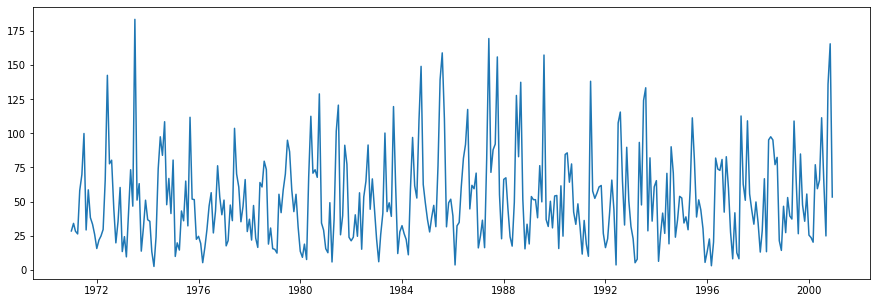

In [29]:
plt.figure(figsize=(15,5))
plt.plot(multi_mean['311.460.0'])

In [30]:
catchment_senorge = multi_mean.to_csv('multi_mean.csv')